In [ ]:
# import analytical libraries
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Read in CSV data to Dataframe
df = pd.read_csv('ADM.csv')
saved_df = df.copy(deep = True) # create copy of orginal dataframe

# Drop Multiple Columns (not required for this analysis)
df = df.drop(['Open','High','Low','Volume','Adj Close'], axis=1)

# subset of data
df = df.iloc[6000:8000]
df.reset_index(inplace=True) # Reset the index to default integer index

#
df

,index,Date,Close
0,6000,2003-12-19,15.120000
1,6001,2003-12-22,15.120000
2,6002,2003-12-23,15.180000
3,6003,2003-12-24,15.200000
4,6004,2003-12-26,15.170000
...,...,...,...
1995,7995,2011-11-21,28.290001
1996,7996,2011-11-22,28.410000
1997,7997,2011-11-23,27.790001
1998,7998,2011-11-25,27.900000


In [145]:
df.describe()

,index,Close
count,2000.000000,2000.000000
mean,6999.500000,29.224510
std,577.494589,7.535866
min,6000.000000,14.950000
25%,6499.750000,24.240000
50%,6999.500000,29.230000
75%,7499.250000,34.352499
max,7999.000000,48.180000


### Standard Deviation Block/Interval Calculations

In [146]:
def func_std(df,column,interval): # interval=integer,dataframe
    interval_size = interval # interval

    # Calculate standard deviation for each interval
    global std_dev_per_row_interval
    std_dev_per_row_interval = {}
    for i in range(0, len(df), interval_size): # start,stop,step
        start_index = i
        end_index = min(i + interval_size, len(df))
        interval_df = df.iloc[start_index:end_index]
        if not interval_df.empty:
            std_dev_per_row_interval[f'{start_index}-{end_index-1}'] = interval_df[column].std()
        else:
            std_dev_per_row_interval[f'{start_index}-{end_index-1}'] = np.nan
    print(std_dev_per_row_interval)

    # build dataframe
    global new_df
    global df_transposed
    new_df = pd.DataFrame(std_dev_per_row_interval,index=[0])
    df_transposed = new_df.T
    print("\nTransposed DataFrame:")
    print(df_transposed)

    #
    plt.grid(True)
    plt.bar(df_transposed.index, df_transposed[0])
    plt.xticks(rotation=45, ha='right')
    plt.title('Standard-Deviation-Analysis-Block-Intervals')
    plt.xlabel("standard_deviation")
    plt.ylabel("Frequency")
    plt.show()



{'0-99': 0.7954801732150311, '100-199': 0.38743254760687135, '200-299': 2.31874621127204, '300-399': 1.8682955513700386, '400-499': 1.224485279956929, '500-599': 4.90060981532495, '600-699': 1.79276858130582, '700-799': 2.3135954459146917, '800-899': 1.678241910893078, '900-999': 1.6707537917372322, '1000-1099': 2.1908875039854774, '1100-1199': 6.859428194113861, '1200-1299': 3.918256775065402, '1300-1399': 1.3833415667132956, '1400-1499': 1.4946710935857104, '1500-1599': 1.0840080448428417, '1600-1699': 2.431611087696677, '1700-1799': 1.871070208520512, '1800-1899': 2.7365938464879114, '1900-1999': 1.7433570798244509}

Transposed DataFrame:
                  0
0-99       0.795480
100-199    0.387433
200-299    2.318746
300-399    1.868296
400-499    1.224485
500-599    4.900610
600-699    1.792769
700-799    2.313595
800-899    1.678242
900-999    1.670754
1000-1099  2.190888
1100-1199  6.859428
1200-1299  3.918257
1300-1399  1.383342
1400-1499  1.494671
1500-1599  1.084008
1600-1699 

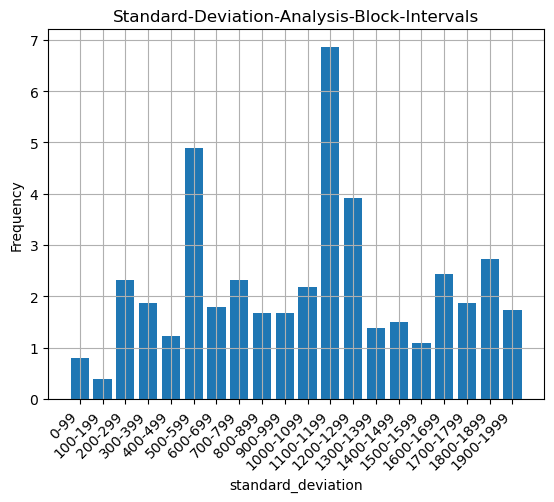

In [147]:
func_std(df,'Close',100)